# Chapter 8. 축소

차원의 저주
* 많은 특성으로 훈련이 느려지거나 좋은 솔루션을 찾을 수 없는 문제

차원 축소의 장점
* 특성 수를 크게 줄여서 훈련 속도를 높일 수 있다.
* 데이터 시각화에도 유용하다.

차원 축소의 단점
* 일부 정보가 유실되어 시스템의 성능이 나빠질 수 있다.
* 작업 파이프라인이 복잡하게 되고 유지 관리하기가 어려워진다.
* 그러므로 차원 축소를 고려하기 전에 훈련이 너무 느린지 먼저 원본 데이터로 시스템을 훈련해봐야 한다.

## 8.1 차원의 저주

고차원 데이터셋은 훈련 데이터가 서로 멀리 떨어져 있다.  
새로운 샘플도 훈련 샘플과 멀리 떨어져 있을 가능성이 높기 때문에 이 경우 예측을 위해 많은 extrapolation을 해야 하기 때문에 저차원일 때보다 예측이 더 불안해진다.  
간단히 말해 훈련 세트의 차원이 클수록 과대적합의 위험이 커진다.

이론적으로 차원의 저주를 해결하는 해결책 하나는 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것이다.  
하지만 일정 밀도에 도달하기 위해 필요한 훈련 샘플 수는 차원 수가 커짐에 따라 기하급수적으로 늘어난다.

## 8.2 차원 축소를 위한 접근 방법

### 8.2.1 투영

결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 부분공간(subspace)에 놓여있다.

고차원 공간의 저차원 부분공간으로 투영하면 차원을 줄일 수 있다.

하지만 많은 경우에 swiss roll 데이터셋처럼 부분 공간이 뒤틀리거나 휘어있기도 하다.

### 8.2.2 매니폴드 학습

2D 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D 모양이다.  
더 일반적으로 d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부이다.

매니폴드 학습
* 많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동하는 학습
* 이는 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 매니폴드 가정 혹은 매니폴드 가설에 근거한다.

회귀나 분류등의 처리해야 할 작업이 저차원의 미니폴드 공간에 표현되면 더 간단해질 것이라는 가정이 동반된다.
그림8-6의 첫 행에서처럼 3D에서는 결정 경계가 매우 복잡하지만 매니폴드 공간인 2D에서는 단순한 직선으로 나타난다.

모델을 훈련시키기 전에 훈련 세트의 차우넝르 감소시키면 훈련 속도는 빨라지지만 항상 더 낫거나 간단한 솔루션이 되는 것은 아니다.

## 8.3 PCA

주성분 분석(PCA)는 가장 인기 있는 차원 축소 알고리즘이다.  
데이터에 가장 가까운 초평면(hyperplane)을 정의한 다음, 데이터를 이 평면에 투영시킨다.

### 8.3.1 분산 보존
저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야한다.  
분산을 최대로 보존하는 초평면을 찾아야 정보가 가장 적게 손실되므로 합리적이다.  
이는 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축이다.

### 8.3.2 주성분
PCA는 훈련 세트에서 분산이 최대인 축을 찾는다.  
첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다.

i번째 축을 이 데이터의 i번째 주성분(principal component)라고 부른다.

훈련 세트의 주성분은 특잇값 분해(SVD)라는 표준 행렬 분해 기술을 이용해서 찾을 수 있다.  
찾고자 하는 모든 주성분의 단위벡터가 V에 담겨있다.  
PCA는 데이터셋의 평균이 0이라고 가정하는데, 사이킷런의 PCA는 이 작업을 대신 처리해준다.

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

### 8.3.3 d차원으로 투영하기

$$ X_{d-proj} = XW_d$$

초평면에 훈련 세트를 투영하고 d차원으로 축소된 데이터셋

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

### 8.3.4 사이킷런 사용하기

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

### 8.3.5 설명된 분산의 비율

각 주성분의 축을 따라 있는 데이터셋의 분산 비율로 유용한 정보 중 하나이다.

In [10]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

데이터셋 분산의 84.2%가 첫 PC를 따라 놓여있고 14.6%가 두 번째 PC를 따라 놓여있다.

### 8.3.6 적절한 차원 수 선택하기

임의로 차원의 수를 설정하는 것 보다 충분한 분산이 될 때까지 더해야 할 차원의 수를 선택하는 것이 간단하다.

In [11]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [12]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [14]:
d

154

그림 저장: explained_variance_plot


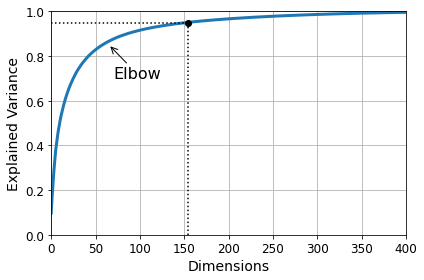

In [15]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [17]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [18]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557439

### 8.3.7 압축을 위한 PCA

차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어든다.  
크기 축소는 분류 알고리즘의 속도를 크게 높일 수 있다.

압축된 데이터셋에 PCA 투영의 변환을 반대로 적용해 원래의 차원으로 되돌릴 수도 있다.  
투영에서 유실된 분산이 존재하지만 원본 데이터와 매우 비슷한 데이터셋을 얻을 수 있다.

재구성 오차
* 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리

In [19]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [20]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

그림 저장: mnist_compression_plot


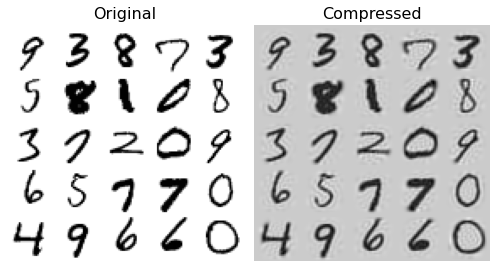

In [21]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

이미지 품질이 조금 손실되었지만 숫자 모양은 거의 유사하다.

역변환 공식 : $ X_{recovered} = X_{d-proj}W_d^T $

### 8.3.8 랜덤 PCA

svd_solver 매개변수를 randomized로 지정하면 랜덤 PCA라는 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾는다.

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### 8.3.9 점진적 PCA

PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것이다.  
이를 보완한 것이 점진적 PCA 알고리즘이다.

점진적 PCA 알고리즘
* 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입
* 훈련 세트가 클 때 유용하고 온라인으로 PCA를 적용할 수 있다.

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [ ]:
X_reduced_inc_pca = X_reduced

In [ ]:
np.allclose(pca.mean_, inc_pca.mean_) # 일반 PCA와 점진적 PCA 평균이 같은지 확인

In [ ]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)
#일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 완전히 동일하지 않음. 점진적 PCA는 근사값을 제공

넘파이 memmap 클래스 사용해 점진적 PCA 구현_ 하드 디스크에 저장된 배열을 메모리에 들어 있는것 처럼 다룸

In [ ]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [ ]:
del X_mm

In [ ]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

## 8.4 커널 PCA

커널 트릭의 기법을 PCA에 적용해 차원 축소를 위한 복자한 비선형 투형을 수행하는 것을 커널 PCA라고 한다.  
투영된 후에 샘플의 군집을 유지하거나 매니폴드 데이터셋을 펼칠 때도 유용하다.

In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

### 8.4.1 커널 선택과 하이퍼파라미터 튜닝

kPCA는 비지도학습이라 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다.  
하지만 차원 축소는 종종 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용해 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

1. kPCA를 사용해 차원을 2차원으로 축소, 분류를 위해 로지스틱 회귀 적용
2. GridSearchCV를 사용해 kPCA의 가장 좋은 커널과 gamma를 찾음

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_params_)

완전한 비지도 학습 방법으로 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식도 있다.  
커널 트릭 덕분에 특성 맵을 이용해 훈련 세트를 무한 차원의 특성공간에 매핑하고, 변환된 데이터셋을 선형 PCA를 사용해 2D로 투영한 것과 수학적으로 동일하다.

축소된 공간의 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 특성 공간에 놓인다.  
이 특성 공간은 무한 차원이라 재구성된 포인트를 계산할 수 없어 여기에 가깝게 매핑된 원본 공간의 포인트를 찾는다.  
이를 재구성 원상이라고 한다.  

원상을 얻게 되면 재구성 원상의 오차를 최소화하는 커널과 하이퍼파라미터를 선택할 수 있다.

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

## 8.5 LLE

지역 선형 임베딩
* 강력한 비선형차원 축소 기술
* 투영에 의존하지 않는 매니폴드 학습임.
1. 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정
2. 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾음.


In [ ]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

In [ ]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

## 8.6 다른 차원 축소 기법

1. 랜덤 투영
    * 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영
    * 차원 축소 품질은 샘플 수와 목표 차원 수에 따라 다르나, 초기차원수에 의존적이지 않음
    
2. 다차원 스케일링(MDS)
    * 샘플 간의 거리를 보존하면서 차원 축소

3. Isomap
    * 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만들고, 샘플간의 지오데식 거리를 유지하면서 차원을 축소
    
4. t-SNE
    * 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하며 차원 축소
    * 주로 시각화에 많이 사용되면 고차원 공간의 샘플의 군집을 시각화할 때 사용

5. 선형 판별 분석(LDA)
    * 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습하는 분류 알고리즘
    * 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있음.
    * 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 SVM 분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 좋다.